#Library Imports

In [138]:
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
from tqdm import tqdm
from PIL import Image

#DATA LOADING

In [139]:
# ! pip install kaggle

In [140]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json


In [141]:
# !kaggle datasets download -d alessiocorrado99/animals10

In [142]:
# zip_file_path = '/content/animals10.zip'

# # Create a directory to extract the files
# extract_dir = '/content/dataset'
# os.makedirs(extract_dir, exist_ok=True)

# # Extract files from the ZIP archive
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     for member in tqdm(zip_ref.infolist(), desc='Extracting files'):
#         zip_ref.extract(member, extract_dir)

In [143]:
def load_dataset(directory, image_size=(128, 128)):
    data = []
    labels = []
    label_mapping = {'cane': 0, 'cavallo': 1, 'elefante': 2, 'farfalla': 3, 'gallina': 4, 'gatto': 5, 'mucca': 6, 'pecora': 7, 'ragno': 8, 'scoiattolo': 9}

    for root, dirs, files in os.walk(directory):
        for file in tqdm(files):
            if file.endswith((".jpg", ".png" ,".jpeg")):
                image_path = os.path.join(root, file)
                label = os.path.basename(os.path.normpath(root))
                if label in label_mapping:
                    image = Image.open(image_path).convert('RGB')
                    image = image.resize(image_size)
                    image = np.array(image)
                    data.append(image)
                    labels.append(label_mapping[label])

    data = np.array(data)
    labels = np.array(labels)
    return data, labels

In [144]:
# Load the dataset
data_dir = '/home/jyotishr/PRNN_ASS_3/Dataset/raw-img'
data, labels = load_dataset(data_dir)

0it [00:00, ?it/s]
  0%|          | 1/1668 [00:00<03:03,  9.07it/s]

100%|██████████| 4863/4863 [00:10<00:00, 466.61it/s]


In [145]:
def split(x, y, test_size=0.4, val_size=0.1, random_state=None):
    # Find unique classes
    classes = np.unique(y)
    # Initialize arrays to hold indices for each class
    class_indices = {c: np.where(y == c)[0] for c in classes}
    
    # Split each class's indices into train, validation, and test sets
    train_indices = []
    val_indices = []
    test_indices = []
    for c in classes:
        indices = class_indices[c]
        np.random.seed(random_state)
        np.random.shuffle(indices)
        test_count = int(len(indices) * test_size)
        val_count = int(len(indices) * val_size)
        
        test_indices.extend(indices[:test_count])
        val_indices.extend(indices[test_count:test_count + val_count])
        train_indices.extend(indices[test_count + val_count:])
    
    # Shuffle the indices to mix the classes
    np.random.seed(random_state)
    np.random.shuffle(train_indices)
    np.random.shuffle(val_indices)
    np.random.shuffle(test_indices)
    
    # Use the indices to split the data
    x_train, y_train = x[train_indices], y[train_indices]
    x_val, y_val = x[val_indices], y[val_indices]
    x_test, y_test = x[test_indices], y[test_indices]
    
    return x_train, x_val, x_test, y_train, y_val, y_test

# Splitting data
x_train, x_val, x_test, y_train, y_val, y_test = split(data, labels)

# Printing the shapes of the datasets to verify the split
print("Train set:", x_train.shape, y_train.shape)
print("Validation set:", x_val.shape, y_val.shape)
print("Test set:", x_test.shape, y_test.shape)

Train set: (13097, 128, 128, 3) (13097,)
Validation set: (2614, 128, 128, 3) (2614,)
Test set: (10468, 128, 128, 3) (10468,)


In [146]:
# # Shuffle the data and labels together
# rng = np.random.RandomState(42)  # Set a (os, numpy, PIL, and tqdm) random seed for reproducibility
# permutation = rng.permutation(len(data))
# data = data[permutation]
# labels = labels[permutation]

# num_samples = len(data)
# train_ratio = 0.6
# val_ratio = 0.1
# test_ratio = 0.3

# # Calculate the sizes for each set
# train_size = int(num_samples * train_ratio)
# val_size = int(num_samples * val_ratio)
# test_size = num_samples - train_size - val_size

# # Split the data into train, validation, and test sets
# x_train, x_val, x_test = data[:train_size], data[train_size:train_size+val_size], data[train_size+val_size:]
# y_train, y_val, y_test = labels[:train_size], labels[train_size:train_size+val_size], labels[train_size+val_size:]





In [5]:
# x_train = (x_train / 255.0) - 0.5
# x_val = (x_val / 255.0) - 0.5
# x_test = (x_test / 255.0) - 0.5

#NEURAL NETWORK MODEL

In [164]:
class Neural_Network:

    def __init__(self, Network):
        self.Network = Network

    # forward pass
    def forward_pass(self, X):
        n = X
        for i in self.Network:
            n = i.forward_pass(n,saved_weights = None)
        return n

    #backward pass
    def backprop(self, Y):
        m = Y
        for i in (reversed(self.Network)):
            m = i.backprop(m)

    # applying sgd
    def applying_sgd(self,batch_size = 1):
        for i in self.Network:
            i.applying_sgd(batch_size = batch_size)

    # applying adam
    def applying_adam(self,batch_size = 1):
        for i in self.Network:
            i.applying_adam(batch_size)

    # changing alpha
    def change_alpha(self):
        for i in self.Network:
            i.change_alpha()

    # saving weights
    def saving_params(self):
        for i,layer in enumerate(self.Network):
            layer.saving_params()

    # predicting after loading weights
    def predict(self,X):
        n = X
        for i in self.Network:
            n = i.forward_pass(n,saved_weights = 1)
        return n


#ADAM

In [165]:
class Adam:
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = None
        self.v = None
        self.t = 0

    def update(self, grads):
        if self.m is None:
            self.m = np.zeros_like(grads)
            self.v = np.zeros_like(grads)

        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * grads
        self.v = self.beta2 * self.v + (1 - self.beta2) * (grads ** 2)
        m_hat = self.m / (1 - self.beta1 ** self.t)
        v_hat = self.v / (1 - self.beta2 ** self.t)
        return self.lr * m_hat / (np.sqrt(v_hat) + self.epsilon)

#ACCURACY

In [166]:
class accuracy:
    def __init__(self):
        pass

    def value(self, out, Y):
        return np.mean(self.out == Y)


#SOFTMAX

In [279]:
class softmax:

    def __init__(self,n_classes):
        self.n_classes = n_classes

    # def expansion(self, actual_pred):
    #     print(actual_pred.shape)
    #     d = actual_pred.shape[0]
    #     one_hot_pred = np.zeros((d,self.n_classes))
    #     for i in range(0,d):
    #         one_hot_pred[i,actual_pred[i]] = 1
    #     return one_hot_pred

    def expansion(self, actual_pred):
        # print(actual_pred.shape)
        # d = actual_pred.shape[0]
        one_hot_pred = np.zeros(self.n_classes)
        one_hot_pred[actual_pred] = 1
        return one_hot_pred

    def forward_pass(self, z, saved_weights = None):

        # # vectorised form below
        # shiftx = z - np.max(z, axis=1, keepdims=True)

        # # Exponentiate the shifted values
        # exps = np.exp(shiftx)

        # # Calculate softmax probabilities
        # self.softmax_probs = exps / np.sum(exps, axis=1, keepdims=True)

        # return self.softmax_probs


        # vectorised form below
        shiftx = z - np.max(z, axis=0, keepdims=True)

        # Exponentiate the shifted values
        exps = np.exp(shiftx)

        # Calculate softmax probabilities
        self.softmax_probs = exps / np.sum(exps, axis=0, keepdims=True)

        return self.softmax_probs

    def backprop(self, Y):
        y = self.expansion(Y)
        self.grad = (self.softmax_probs - y)
        return self.grad


    def applying_sgd(self,batch_size = 1):
        pass

    def change_alpha(self):
        pass

    def applying_adam(self,batch_size = 1):
        pass

    def saving_params(self):
        pass


#FLATTEN

In [168]:
class reshape:

    def __init__(self):
        pass

    def forward_pass(self, data, saved_weights = None):
        self.data_shape = data.shape

        self.flatten = data.flatten()
        return self.flatten

    def backprop(self, prev_data):
        return prev_data.reshape(self.data_shape)

    def applying_sgd(self,batch_size = 1):
        pass

    def change_alpha(self):
        pass

    def applying_adam(self,batch_size = 1):
        pass

    def saving_params(self):
        pass



#CROSS ENTROPY

L = - sum ( y_i * log(p_i) )

In [169]:
class cross_entropy:

    def _init_(self):
        pass

    def loss(self, A, Y):

        # Compute cross-entropy loss
        ce_loss = - np.log(A[Y])

        return ce_loss

In [280]:

class relu:
    def __init__(self):
        pass

    def forward_pass(self, z, saved_weights = None):
        self.z = z
        return np.maximum(0, z)

    def derivative(self, a):
        return np.where(a > 0, 1, 0)

    def backprop(self, grad_previous):
        return grad_previous * self.derivative(self.z)

    def applying_sgd(self,batch_size = 1):
        pass

    def change_alpha(self):
        pass

    def applying_adam(self,batch_size = 1):
        pass

    def saving_params(self):
        pass

#LEAKY RELU

In [281]:
class LeakyReLU:
    def __init__(self, alpha=0.01):
        self.alpha = alpha
        self.z = None

    def forward_pass(self, z, saved_weights = None):
        self.z = z
        return np.where(z > 0, z, self.alpha * z)

    def derivative(self, a):
        return np.where(a > 0, 1, self.alpha)

    def backprop(self, grad_previous):
        return grad_previous * self.derivative(self.z)

    def applying_sgd(self,batch_size = 1):
        pass

    def change_alpha(self):
        pass

    def applying_adam(self,batch_size = 1):
        pass

    def saving_params(self):
        pass


#LAYER_MLP

In [335]:
class Linear_Layer:

    def __init__(self, in_dim, out_dim, alpha = 0.01,index = 0,reg = None, reg_penelty = 0):
        self.theta = np.random.randn(in_dim, out_dim)/(in_dim * out_dim)
        self.grad_theta = np.zeros_like(self.theta)
        self.bias = np.ones((out_dim,))/out_dim
        self.grad_bias = np.zeros_like(self.bias)
        self.optimizer_theta = Adam(lr = alpha)
        self.optimizer_bias = Adam(lr = alpha)
        self.alpha = alpha
        # self.index = index
        self.reg = reg
        self.reg_penelty = reg_penelty


    def forward_pass(self, X, saved_weights = None):
        if saved_weights != None:
          saved_data = np.load(f'/content/drive/MyDrive/Colab Notebooks/Saved_Models/Linear_layer{self.index}.npz')
          self.theta =  saved_data['arr1']
          self.bias = saved_data['arr2']

        self.X = X
        self.z = np.dot(X,self.theta) + self.bias
        return self.z


    def backprop(self, grad_previous):
        t= self.X.shape[0]
        self.grad_theta = np.dot(self.X.reshape(-1, 1), grad_previous.reshape(1,-1))
        self.grad_bias = (grad_previous.sum(axis=0))/t
        self.grad_back = np.dot(grad_previous, self.theta.transpose()) 
        # print(f"LLL : {self.grad_back[0]}")

        # d_l_d_inputs = np.dot(d_l_d_out, self.weights.T)
        # d_l_d_weights = np.dot(self.last_input.reshape(-1, 1), d_l_d_outd_l_d_inputs = np.dot(d_l_d_out, self.weights.T)
        # d_l_d_weights = np.dot(self.last_input.reshape(-1, 1), d_l_d_out.reshape(1, -1))
        # d_l_d_biases = d_l_d_out)
        # d_l_d_biases = d_l_d_out

        # Add L1 and L2 and elastic regularization terms
        # if self.reg == 'l1':
        #   self.grad_theta += self.reg_penelty * np.sign(self.theta)
        #   self.grad_bias += self.reg_penelty * np.sign(self.bias)

        # elif self.reg == 'l2':
        #   self.grad_theta += 2 * self.reg_penelty * self.theta
        #   self.grad_bias += 2 * self.reg_penelty * self.bias

        # elif self.reg == 'elastic':
        #   self.grad_theta += self.reg_penelty * (0.5 * np.sign(self.theta) + 0.5 * self.theta)
        #   self.grad_bias += self.reg_penelty * (0.5 * np.sign(self.bias) + 0.5 * self.bias)

        return self.grad_back

    def applying_sgd(self,batch_size = 1):
        self.theta = self.theta - (self.alpha*self.grad_theta / batch_size)
        self.bias = self.bias - (self.alpha*self.grad_bias / batch_size)
        
        # self.grad_theta = np.zeros_like(self.grad_theta)
        # self.grad_bias = np.zeros_like(self.grad_bias)

    def applying_adam(self,batch_size = 1):
        self.theta -= self.optimizer_theta.update(self.grad_theta/ batch_size)
        self.bias -= self.optimizer_bias.update(self.grad_bias/ batch_size)
        
        self.grad_theta = np.zeros_like(self.grad_theta)
        self.grad_bias = np.zeros_like(self.grad_bias)

    def change_alpha(self):
        self.alpha = self.alpha/5

    def saving_params(self):
        np.savez(f'/content/drive/MyDrive/Colab Notebooks/Saved_Models/Linear_layer{self.index}.npz',arr1 = self.Theta, arr2 = self.bias)

#SELF ATTENTION

In [332]:
class self_attention:
    def __init__(self, d, d_k, alpha = 0.01,index = 0,reg = None, reg_penelty = 0):
        self.d_k = d_k
        self.W_K = np.random.randn(d, d_k)/(d * d_k)
        self.W_Q = np.random.randn(d, d_k)/(d * d_k)
        self.W_V = np.random.randn(d, d_k)/(d * d_k)
        
        self.grad_Wk = np.zeros_like(self.W_K)
        self.grad_Wq = np.zeros_like(self.W_Q)
        self.grad_Wv = np.zeros_like(self.W_V)

        self.optimizer_Wk = Adam(lr = alpha)
        self.optimizer_Wv = Adam(lr = alpha)
        self.optimizer_Wq = Adam(lr = alpha)
        self.alpha = alpha

        # self.optimizer_bias = Adam(lr = alpha)
        # self.alpha = alpha
        # self.reg = reg
        # self.reg_penelty = reg_penelty

    def softmax(self,z):
        # self.n = z.shape[1]
        # vectorised form below
        shiftx = z - np.max(z, axis=1, keepdims=True)

        # Exponentiate the shifted values
        exps = np.exp(shiftx)

        # Calculate softmax probabilities
        softmax_probs = exps / np.sum(exps, axis=1, keepdims=True)

        return softmax_probs


    def forward_pass(self, X, saved_weights = None):
        # if saved_weights != None:
        #   saved_data = np.load(f'/content/drive/MyDrive/Colab Notebooks/Saved_Models/Linear_layer{self.index}.npz')
        #   self.W_K =  saved_data['arr1']
        #   self.W_Q =  saved_data['arr2']
        #   self.W_V =  saved_data['arr3']

        self.X = X

        # query key value vectors
        self.Q = np.matmul(X, self.W_Q)
        self.K = np.matmul(X, self.W_K)
        self.V = np.matmul(X, self.W_V)

        # print(self.W_K[0][0])
        t = np.matmul(self.Q, (self.K).T) / np.sqrt(self.d_k)
        self.H = self.softmax(t)
        output = np.matmul(self.H,self.V)

        return output


    def backprop(self, grad_previous):

        self.grad_Wv = np.matmul(np.matmul(self.X.T,self.H.T),grad_previous)

        t1 = np.multiply(self.H,np.matmul(grad_previous,self.V.T))
        t2 = self.Q - np.matmul(self.H,self.Q)
        self.grad_Wk = (1/np.sqrt(self.d_k)) * np.matmul(np.matmul(self.X.T,t1),t2)

        t3 = np.sum(np.multiply(self.H,np.matmul(grad_previous,self.V.T)),axis = 1)
        t4 = np.multiply(t3,self.H)
        t5 = np.multiply(self.H, np.matmul(grad_previous,self.V.T)) - t4
        self.grad_Wq = (1/np.sqrt(self.d_k)) * np.matmul(np.matmul(self.X.T,t5),self.K)


        # Add L1 and L2 and elastic regularization terms
        # if self.reg == 'l1':
        #   self.grad_theta += self.reg_penelty * np.sign(self.Theta)
        #   self.grad_bias += self.reg_penelty * np.sign(self.bias)
        #   self.grad_theta += self.reg_penelty * np.sign(self.Theta)

        # elif self.reg == 'l2':
        #   self.grad_theta += 2 * self.reg_penelty * self.Theta
        #   self.grad_bias += 2 * self.reg_penelty * self.bias
        #   self.grad_theta += self.reg_penelty * np.sign(self.Theta)

        # elif self.reg == 'elastic':
        #   self.grad_theta += self.reg_penelty * (0.5 * np.sign(self.Theta) + 0.5 * self.Theta)
        #   self.grad_bias += self.reg_penelty * (0.5 * np.sign(self.bias) + 0.5 * self.bias)
        #   self.grad_theta += self.reg_penelty * np.sign(self.Theta)

        return 0

    def applying_sgd(self,batch_size = 1):
        # print(self.grad_Wk[0][0])
        # print(self.W_K[0][0])
        self.W_K -=  self.alpha * self.grad_Wk / batch_size
        # print(self.W_K[0][0])
        self.W_Q -=  self.alpha * self.grad_Wq / batch_size
        self.W_V -=  self.alpha * self.grad_Wv / batch_size
        
        # self.grad_Wk =  np.zeros_like(self.grad_Wk)
        # self.grad_Wq =  np.zeros_like(self.grad_Wq)
        # self.grad_Wv =  np.zeros_like(self.grad_Wv)

    def applying_adam(self,batch_size = 1):
        self.W_K =  self.optimizer_Wk.update(self.grad_Wk / batch_size)        
        self.W_Q =  self.optimizer_Wq.update(self.grad_Wq / batch_size)
        self.W_V =  self.optimizer_Wv.update(self.grad_Wv / batch_size)
        
        self.grad_Wk =  np.zeros_like(self.grad_Wk)
        self.grad_Wq =  np.zeros_like(self.grad_Wq)
        self.grad_Wv =  np.zeros_like(self.grad_Wv)


    def change_alpha(self):
        self.alpha = self.alpha/5

    def saving_params(self):
        np.savez(f'/content/drive/MyDrive/Colab Notebooks/Saved_Models/Linear_layer{self.index}.npz',arr1 = self.Theta, arr2 = self.bias)

In [174]:
# Implementing Image Tokenisation:
def image_tokenization(images, patch_size):
    num_images, image_height, image_width, channels = images.shape

    # Initialize an array to store the flattened patches
    patches_dataset = []

    # Extract patches for each image
    for i in range(num_images):
        image = images[i]
        patches_image = []
        for h in range(0, image_height-patch_size+1, patch_size):
            for w in range(0, image_width-patch_size+1, patch_size):
                # Define patch
                patch = image[h:h+patch_size, w:w+patch_size, :].copy().reshape(-1)
                patches_image.append(patch)

        patches_dataset.append(patches_image)
    return np.array(patches_dataset)

In [226]:


import numpy as np

def positional_encoding(data):
    n_images, n_patches, n_features = data.shape

    position = np.arange(n_features)
    freqs = 1 / (10000 ** (2 * np.arange(n_features) / n_features))

    sin_encoding = np.sin(position[:n_features // 2] * freqs[:n_features // 2])
    cos_encoding = np.cos(position[n_features // 2:] * freqs[n_features // 2:])

    encoding = np.concatenate([sin_encoding, cos_encoding], axis=0)

    # Expand dimensions of encoding to match data shape
    encoding = np.expand_dims(encoding, axis=(0, 1))

    # Add encoding to data using broadcasting
    encoded_data = data + encoding

    return encoded_data




In [219]:
import numpy as np

def PCA(X, n_components):
    # Standardize the data
    X_std = (X - np.mean(X, axis=0)) #/ np.std(X, axis=0)
    
    # Compute the covariance matrix efficiently
    cov_matrix = np.cov(X_std, rowvar=False)
    
    # Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    
    # Sort eigenvectors based on eigenvalues
    idx = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, idx]
    
    # Choose the top n_components eigenvectors
    top_eigenvectors = eigenvectors[:, :n_components]

    # Project data onto the selected eigenvectors
    transformed_data = np.dot(X_std, top_eigenvectors)
    
    return transformed_data

In [216]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_val = x_val / 255.0

In [221]:
n_component = 100
limit = 1000

x_train_flat = image_tokenization(x_train,16)
x_test_flat = image_tokenization(x_test,16)
x_val_flat = image_tokenization(x_val[:limit],16)


x_train_pca = np.zeros((x_train_flat.shape[0],x_train_flat.shape[1],n_component))
x_test_pca  = np.zeros((x_test_flat.shape[0] ,x_test_flat.shape[1],n_component))
x_val_pca   = np.zeros((x_val_flat.shape[0]  ,x_val_flat.shape[1],n_component))

for i,img in enumerate(x_train_flat):
    x_train_pca[i] = PCA(X = img,n_components = n_component)
    
print("train_pca_success")
    
for i,img in enumerate(x_test_flat):
    x_test_pca[i] = PCA(X = img,n_components = n_component)

print("test_pca_success")

    
for i,img in enumerate(x_val_flat):
    x_val_pca[i] = PCA(X = img,n_components = n_component)

print("val_pca_success")



print(f"PCA train shape: {x_train_pca.shape}")
print(f"PCA test shape: {x_test_pca.shape}")
print(f"PCA val shape: {x_val_pca.shape}")

train_pca_success
test_pca_success
val_pca_success
PCA train shape: (13097, 64, 100)
PCA test shape: (10468, 64, 100)
PCA val shape: (1000, 64, 100)


In [227]:
x_train_encoded = positional_encoding(x_train_pca)
print(f"Encoded train shape: {x_train_encoded.shape}")

x_test_encoded = positional_encoding(x_test_pca)
print(f"Encoded test shape: {x_test_encoded.shape}")

x_val_encoded = positional_encoding(x_val_pca)
print(f"Encoded validation shape: {x_val_encoded.shape}")

Encoded train shape: (13097, 64, 100)
Encoded test shape: (10468, 64, 100)
Encoded validation shape: (1000, 64, 100)


In [336]:
complete_NN = Neural_Network([
    self_attention(d = n_component,d_k = 64, alpha = 0.1),
    reshape(),
    Linear_Layer(4096,784, alpha = 0.1),
    LeakyReLU(),
    Linear_Layer(784,256, alpha = 0.1),
    LeakyReLU(),
    Linear_Layer(256,64, alpha = 0.1),
    LeakyReLU(),
    Linear_Layer(64,10, alpha = 0.1),
    LeakyReLU(),
    softmax(10)
])


In [338]:
ce = cross_entropy()
epochs = 5
batch = 1

train_loss = []
val_loss = []

for e in range(epochs):
  loss = 0
  predictions = []
  for i,img in enumerate(x_train_encoded[:]):
    probs = complete_NN.forward_pass(img)
    predictions.append(np.argmax(probs))
    loss += ce.loss(probs,y_train[i])
    complete_NN.backprop(y_train[i])
    
    # if (i+1) % batch == 0 or (i+1) == x_train_encoded.shape[0]:
    complete_NN.applying_sgd(batch)

  print(f"EPOCH {e+1} \t Train Accuracy is : {np.mean(predictions == y_train[:x_train_encoded[:].shape[0]])*100}")
  # print(f"Loss is : {loss / x_train_encoded.shape[0]}")
  
  train_preds = []
  val_preds = []
  t_loss = 0
  v_loss = 0
  
  
  
  for i in range(limit):
    train_probs = complete_NN.forward_pass(x_train_encoded[i])
    val_probs = complete_NN.forward_pass(x_val_encoded[i])
    
    train_preds.append(np.argmax(train_probs))
    t_loss += ce.loss(train_probs,y_train[i])
    
    val_preds.append(np.argmax(val_probs))
    v_loss += ce.loss(val_probs,y_val[i])
    
  train_loss.append(t_loss/limit)
  val_loss.append(v_loss/limit)
    

EPOCH 1 	 Train Accuracy is : 18.299839657936932
EPOCH 2 	 Train Accuracy is : 18.326614931626448
EPOCH 3 	 Train Accuracy is : 18.401783612062257
EPOCH 4 	 Train Accuracy is : 18.46382859547044
EPOCH 5 	 Train Accuracy is : 18.481942574931242


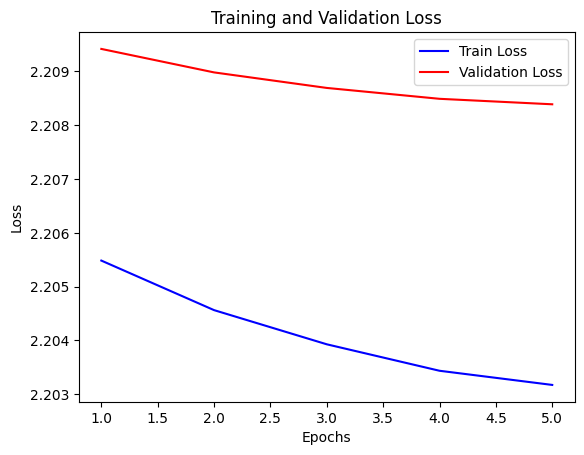

In [353]:
epochs_list = range(1, len(train_loss) + 1)

# Plotting
plt.plot(epochs_list, train_loss, 'b', label='Train Loss')
plt.plot(epochs_list, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [354]:
test_predictions = []
for i in x_test_encoded:
    test_probs = complete_NN.forward_pass(i)
    test_predictions.append(np.argmax(test_probs))

print(f"Test Accuracy is : {np.mean(test_predictions == y_test)*100}")


Test Accuracy is : 18.58043561329767


In [355]:
def confusion_matrix(predicted,actual,n_classes):
  conf_mat = np.zeros((n_classes, n_classes))
  for i in range(len(predicted)):
    conf_mat[int(actual[i])][int(predicted[i])] = conf_mat[int(actual[i])][int(predicted[i])] + 1

  return conf_mat